# **INDICE DE SUICIDIOS POR IDH**

## Importação das dependencias

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## **Importação do dataset de suicidos**

* Dataset no link
https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

#### Dicionário de Variáveis
O arquivo csv importado possui 12 colunas, provenientes da compilação dos 4 datasets mencionados acima. As variáveis são:

* **country**: país onde os dados foram registrados
101 países
* **year**: ano em que os dados foram registrados
1987 a 2016
* **sex**: sexo considerado no registro
male – masculino
female – feminino
* **age**: faixa etária considerada
5-14 anos
15-24 anos
25-34 anos
35-54 anos
55-74 anos
75+ anos

* **suicides_no**: número de suicídios
* **population**: população para o grupo
* **suicides/100k** pop: número de suicídios por 100 mil habitantes
* **country_year**: identificador contendo country + year
* **HDI for year**: Índice de Desenvolvimento Humano (IDH) para o ano
* **gdp_for_year**: Produto Interno Bruto (PIB) para o ano
* gdp_per_capita: Produto Interno Bruto (PIB) per capita

In [435]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")

## Faixa etária com maior índice de suícidio

##--------------------------------------------- NOVO ---------------------------------------

In [436]:
df.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

## Pergunta de pesquisa

- Pais com IDH mais alto possui mais suicidios?


## Categoria de IDH (alto, médio, e baixo)

- alto (< 0,7)
- médio (0,6 a 0,699)
- baixo (0 a 5,99)

**Referencia para classificação do IDH**

https://escolakids.uol.com.br/geografia/paises-desenvolvidos.htm

## **Media de suicidios por 100 mil Habitantes**

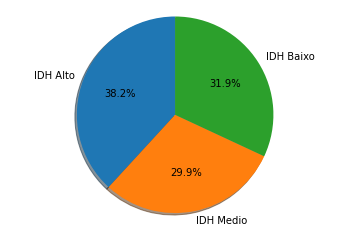

In [440]:
df_idh_alto_media = df_idh_alto['suicides/100k pop'].mean()
df_idh_medio_media = df_idh_medio['suicides/100k pop'].mean()
df_idh_baixo_media = df_idh_baixo['suicides/100k pop'].mean()

medias_suicidios_por_idh = np.array([df_idh_alto_media, df_idh_medio_media, df_idh_baixo_media])
labels = ["IDH Alto", "IDH Medio", "IDH Baixo"]

fig1, ax1 = plt.subplots()
ax1.pie(medias_suicidios_por_idh, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

É possivel observar que os paises com o IDH mais alto possui a maior média suicideos por 100 mil habitantes. Paises com IDH medio e baixo possuem quase a mesma taxa de suicido

# **Paises com a maior taxa de suicidio por IDH**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

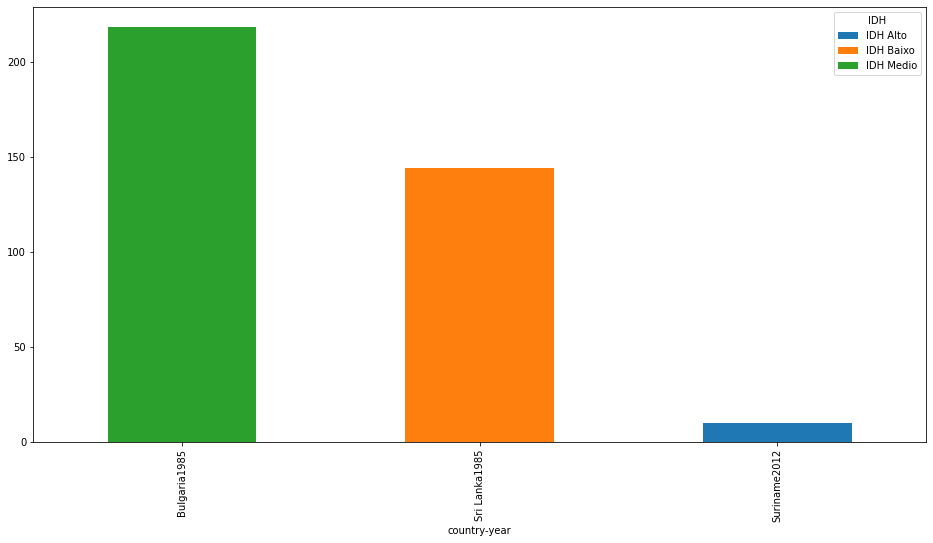

In [441]:
# print(df['HDI for year'] == np.nan)/
df_idh_alto = df[df['HDI for year'] > 0.7]
df_idh_medio = df[(df['HDI for year'] > 0.599) & (df['HDI for year'] < 0.699)]
df_idh_baixo = df[(df['HDI for year'] > 0) & (df['HDI for year'] < 0.599)]


#####
lista_idh = []
for x in range(df_idh_alto['HDI for year'].count()):
    lista_idh.append("IDH Alto")

df_idh_alto["IDH"] = lista_idh


#####

lista_idh = []
for x in range(df_idh_medio['HDI for year'].count()):
    lista_idh.append("IDH Medio")

df_idh_medio["IDH"] = lista_idh

#######

lista_idh = []
for x in range(df_idh_baixo['HDI for year'].count()):
    lista_idh.append("IDH Baixo")

df_idh_baixo["IDH"] = lista_idh
suicideos_pais = pd.concat([df_idh_alto.nlargest(1,['suicides/100k pop']), df_idh_medio.nlargest(1,['suicides/100k pop']), df_idh_baixo.nlargest(1,['suicides/100k pop'])])


table = pd.pivot_table(suicideos_pais, values='suicides_no', index=['country-year'], columns=['IDH'])

table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="IDH")

- No IDH Alto, Suriname como a maior taxa de suicideos 
- No IDH Baixo, Siri Lanka como a maior taxa de suicideos
- No IDH Medio, Bulgaria como a maior taxa de suicideos

---



## **Evolução da taxa de suicidio por ano**

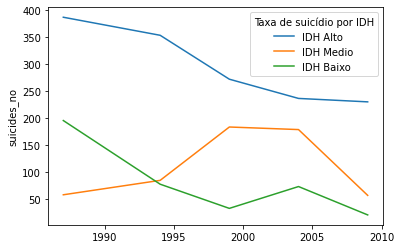

In [447]:
def criar_df(local_df):
    list_suicides_no = []
    list_ano = []
    media_ano = []
    years = df.year.unique()
    local_df = local_df[local_df['year'] <= 2009]
    media_geral = local_df['suicides/100k pop'].mean()
    for year in years:
        list_ano.append(year)
        list_suicides_no.append(local_df[local_df['year'] == year]['suicides_no'].mean())
        local_mean = local_df[local_df['year'] == year]['suicides/100k pop'].mean()

        if math.isnan(local_mean):
            media_ano.append(media_geral)
        else:
            media_ano.append(local_mean)

    return pd.DataFrame({'year': list_ano, 'mean': media_ano, 'suicides_no': list_suicides_no })


years_aged = df.year.unique()    # pegar os anos para o eixo x
idh_alto = criar_df(df_idh_alto).groupby('year')['suicides_no'].mean()
idh_medio = criar_df(df_idh_medio).groupby('year')['suicides_no'].mean()
idh_baixo = criar_df(df_idh_baixo).groupby('year')['suicides_no'].mean()


# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years_aged, y=idh_alto, label='IDH Alto')
ax = sns.lineplot(x=years_aged, y=idh_medio, label='IDH Medio')
ax = sns.lineplot(x=years_aged, y=idh_baixo, label='IDH Baixo')
plt.legend(title="Taxa de suicídio por IDH")
plt.plot(figsize=(80,80))
plt.show()



É possivel obserar que de forma geral os suicideos pelo mundo vem caindo

## **Suicideos por Idade agrupado por IDH**

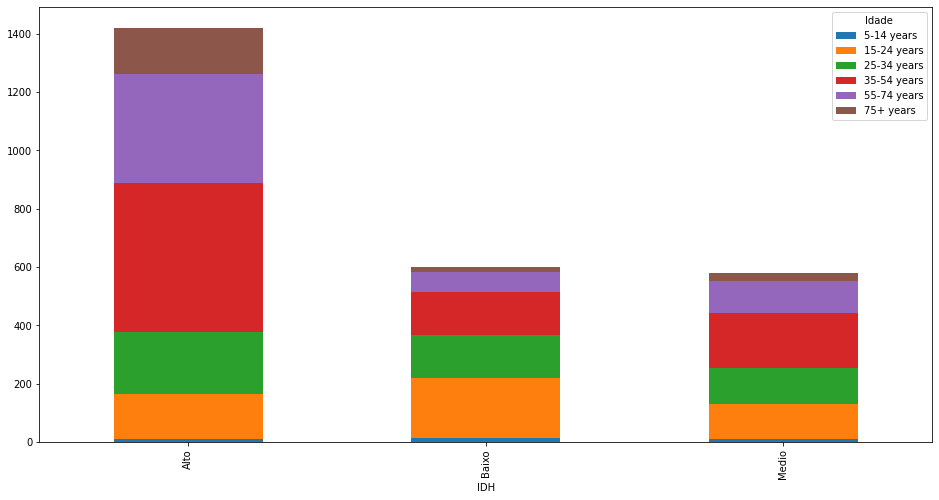

In [433]:
table = pd.pivot_table(df_IDH, values='suicides_no', index=['IDH'], columns=['age'])

column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

- É possivel observar que paises com o IDH alto maior indice de suicideos está na faixa 35-54

- É possivel observar que paises com o IDH baixo maior indice de suicideos está na faixa 15-24. Podemos concluir que pessoas muitos jovens tiram suas vidas